In [82]:
import sklearn.cluster as cluster

# get crappy sensor data

In [83]:
import pymysql
import numpy as np
import pylab as py
import matplotlib.pyplot as plt

import scipy.interpolate as spi

In [6]:
def connect():
    db = pymysql.connect(host = "rm-j6cluj4576jdi6n6oo.mysql.rds.aliyuncs.com",database = 'vrclassroom', user='cognitiveleap', password= 'QWE@123456')
    return db

In [6]:
db = connect()
cursor = db.cursor()
sql = "SELECT TimeLog, Ax, Ay, Az FROM sensordataoutput WHERE CasdId = 21 AND SensorId = 1 ORDER BY TimeLog"
cursor.execute(sql)
results = np.asarray(cursor.fetchall())
time = results[:, 0]
x = results[:, 1]
y = results[:, 2]
z = results[:, 3]
 

In [3]:
#spline interpolation
def to_ms_db(string):
    ms = 1000 * (int(string[11:13]) * 3600 + int(string[14:16]) * 60 + int(string[17:19])) + int(string[20:23])
    return ms
def to_ms_csv(string):
    ms = 1000 * (int(string[9:11]) * 3600 + int(string[11:13]) * 60 + int(string[13:15])) + int(string[16:19])
    return ms

def inter(degree, x, y, z, time, to_ms):
    t = [to_ms(t) - to_ms(time[0]) for t in time]
    tnew = np.arange(0, t[-1] , 50)
    s = spi.splrep(t, x, k = degree)
    xnew = spi.splev(tnew, s)
    s = spi.splrep(t, y, k = degree)
    ynew = spi.splev(tnew, s)
    s = spi.splrep(t, z, k = degree)
    znew = spi.splev(tnew, s)
    return[xnew, ynew, znew]

In [14]:
xnew, ynew, znew = inter(1, x, y, z, time, to_ms_db)
xdiff = np.diff(xnew)
ydiff = np.diff(ynew)
zdiff = np.diff(znew)
xyz = np.asmatrix([xdiff, ydiff,zdiff]).T
print (xyz)

[[ 0.00032552  0.00260417  0.        ]
 [ 0.00043529 -0.00219537  0.00161246]
 [-0.00076081  0.00056777 -0.00258903]
 ..., 
 [ 0.00630327 -0.00754616 -0.00239702]
 [ 0.00102095 -0.0287642   0.0139604 ]
 [-0.0057706   0.01043146  0.012318  ]]


In [81]:
kmeans = cluster.KMeans(n_clusters = 4, init = 'k-means++').fit(xyz)
labels = kmeans.labels_

In [82]:
plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
ax1 = plt.subplot(411)
ax1.plot(xdiff)
ax2 = plt.subplot(412, sharex = ax1)
ax2.plot(ydiff)
ax3 = plt.subplot(413, sharex = ax1)
ax3.plot(zdiff)
ax4 = plt.subplot(414, sharex = ax1)
ax4.scatter(range(len(labels)), labels, s = 0.1)
#     if labels[i] == 0:
#         ax4.scatter(i, 0, color = 'g', s = )
#     if labels[i] == 1:
#         ax4.scatter(i, 1, color = 'r'， )
#     if labels[i] == 2:
#         ax4.scatter(i, 2, color = 'b')
#     if labels[i] == 3:
#         ax4.scatter(i, 3, color = 'y')

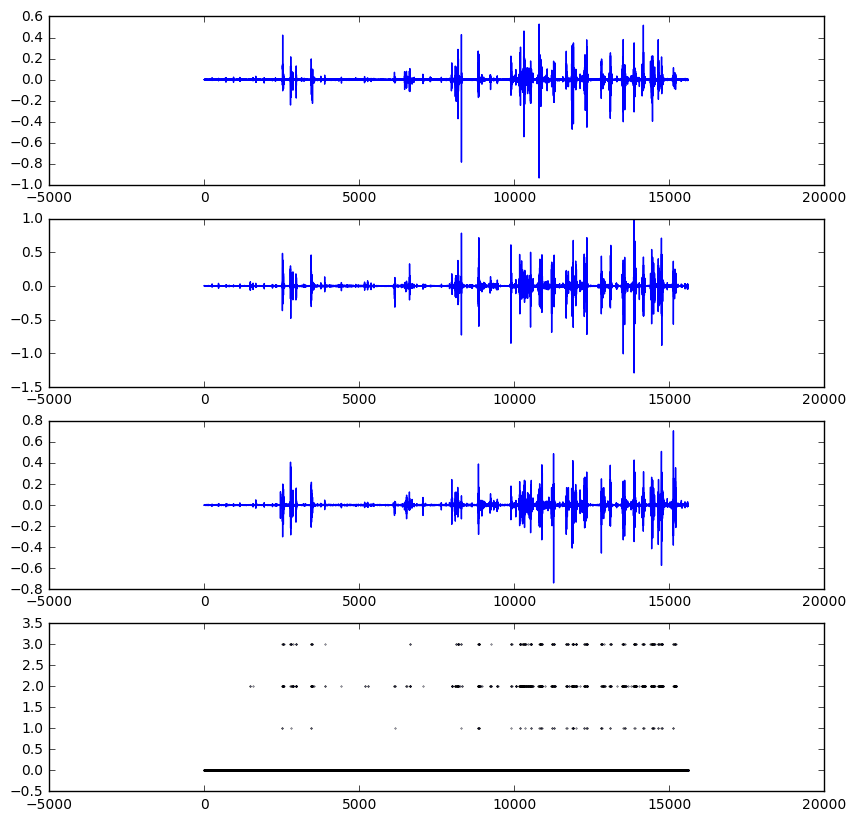

In [83]:
plt.show()

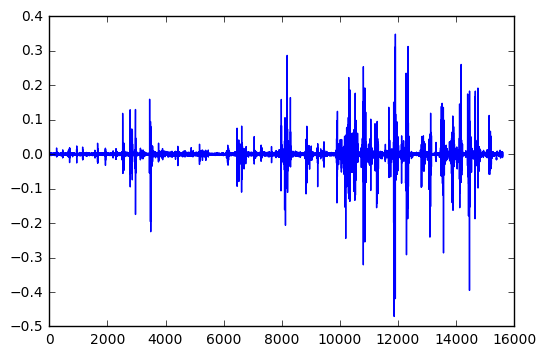

In [99]:
group = 0
# index = [i for i in range(len(labels)) if labels[i] == group]
signalx = [xdiff[i] if labels[i] == group else 0 for i in range(len(xdiff)) ]
plt.plot(signalx)
plt.show()

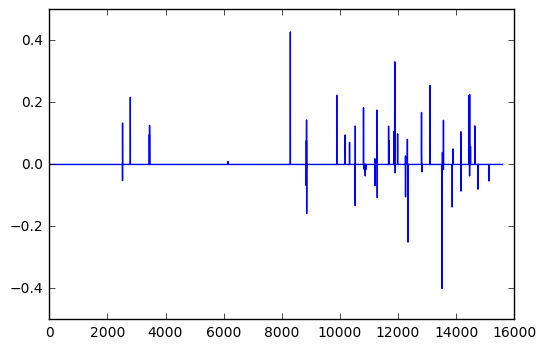

In [100]:
group = 1
# index = [i for i in range(len(labels)) if labels[i] == group]
signalx = [xdiff[i] if labels[i] == group else 0 for i in range(len(xdiff)) ]
plt.plot(signalx)
plt.show()

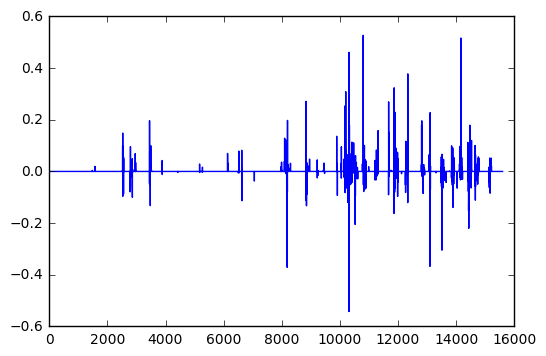

In [101]:
group = 2
# index = [i for i in range(len(labels)) if labels[i] == group]
signalx = [xdiff[i] if labels[i] == group else 0 for i in range(len(xdiff)) ]
plt.plot(signalx)
plt.show()

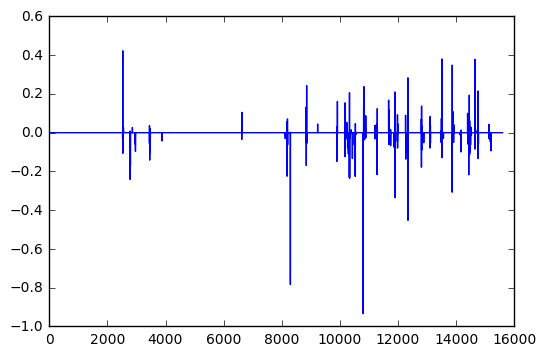

In [102]:
group = 3
# index = [i for i in range(len(labels)) if labels[i] == group]
signalx = [xdiff[i] if labels[i] == group else 0 for i in range(len(xdiff)) ]
plt.plot(signalx)
plt.show()

# Cluster Head on 6 dimensions

In [59]:
db = connect()
cursor = db.cursor()
sql = "SELECT PosX, PosY, PosZ FROM hmd_data WHERE CasdId = 26 ORDER BY TimeLog, TimeLogMillisecond"
cursor.execute(sql)
results = np.asarray(cursor.fetchall())
x = results[:, 0]
y = results[:, 1]
z = results[:, 2]


In [61]:
xdiff = np.diff(x)
ydiff = np.diff(y)
zdiff = np.diff(z)
xdiff2 = np.diff(x, 2)
ydiff2 = np.diff(y, 2)
zdiff2 = np.diff(z, 2)
xyz = np.asmatrix([xdiff[:-1], ydiff[:-1],zdiff[:-1], xdiff2, ydiff2, zdiff2]).T
print (xyz * 50 * 100)

[[-4.43   2.95   0.75   1.955 -1.95   0.05 ]
 [-2.475  1.     0.8   -1.805  1.85   0.1  ]
 [-4.28   2.85   0.9   -0.045  0.2   -0.45 ]
 ..., 
 [-1.425  0.1   -0.99   1.4    0.6   -0.365]
 [-0.025  0.7   -1.355 -0.21  -0.95   0.685]
 [-0.235 -0.25  -0.67  -0.45   0.05  -0.345]]


In [47]:
kmeans = cluster.KMeans(n_clusters = 6, init = 'k-means++').fit(xyz)
labels = kmeans.labels_

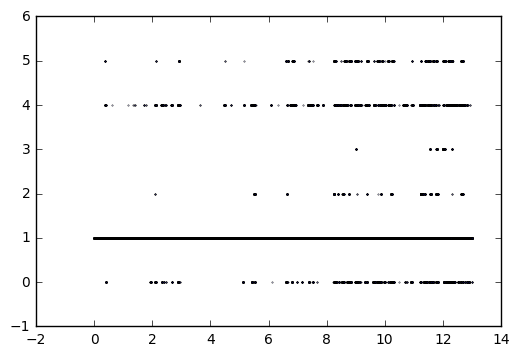

In [44]:
t = np.arange(0, len(labels) / 60 / 50, 1/60/50)[:-1]
plt.scatter(t, labels, s = 0.1 )
plt.show()

# Segmentation and then clustering using DTW

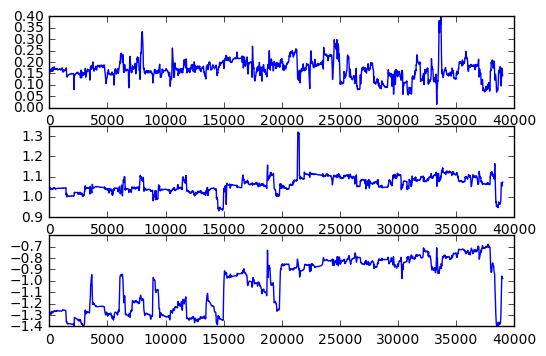

In [60]:
ax1 = plt.subplot(311)
ax1.plot(x)
ax2 = plt.subplot(312)
ax2.plot(y)
ax3 = plt.subplot(313)
ax3.plot(z)
plt.show()

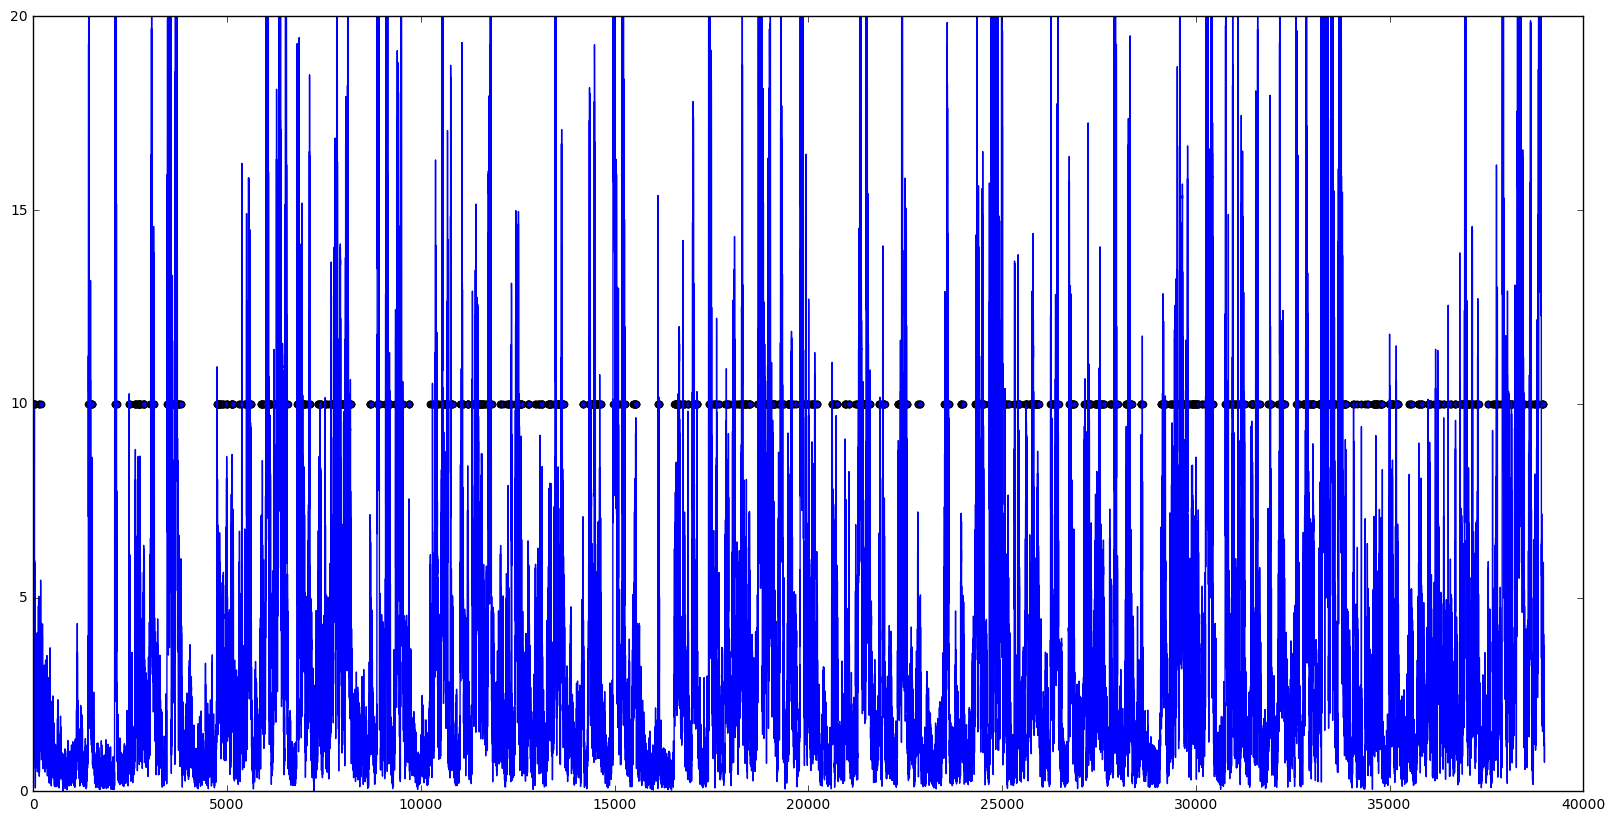

In [64]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot((xdiff **2 + ydiff **2 + zdiff ** 2) ** 0.5 * 50 * 100) 
plt.scatter(breakpt, [10] * len(breakpt))
plt.ylim(0, 20)
plt.xlim(0, 40000)
plt.show()

In [ ]:

xyz = 50 * 100 * (xdiff **2 + ydiff **2 + zdiff ** 2) ** 0.5 
breakpt = []
threshold = 5

In [72]:
#set break points by a velocity threshold
threshold = 5
def is_break_point(pre, cur, nex):
    if cur <= threshold:
        if pre > threshold:
            return True
        elif nex > threshold:
            return True
    return False
def return_break_point(xyz):
    breakpt = []
    for i in range(1, len(xyz) - 1):
        if is_break_point(xyz[i - 1], xyz[i], xyz[i+1]):
            breakpt.append(i)
    return [0] + breakpt + [len(xyz) - 1]

        
def return_moving_bpindex_and_segments(xyz, x, y, z):
    breakpt = return_break_point(xyz)
    segs = []
    breakpt_m_index = []
    for i in range(1, len(breakpt)):
        pre = breakpt[i-1]
        cur = breakpt[i]
        if xyz[pre+1] > threshold:
            segs.append(np.array([x[pre:cur], y[pre:cur], z[pre:cur]]).T)
            breakpt_m_index.append(i-1)
    return breakpt_m_index, segs

In [89]:
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

condenseddismatrix = []
for i in range(len(segs)):
    a = segs[i]

    for j in range(i + 1, len(segs)):
        b = segs[j]
        distance, path = fastdtw(a, b, dist=euclidean)
        condenseddismatrix.append(distance)



In [69]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(condenseddismatrix, method='average')

In [70]:
print(Z)

[[  1.35000000e+03   1.35100000e+03   3.10759286e-03   2.00000000e+00]
 [  5.92000000e+02   6.17000000e+02   3.13860915e-03   2.00000000e+00]
 [  7.37000000e+02   7.38000000e+02   3.28267598e-03   2.00000000e+00]
 ..., 
 [  3.47700000e+03   3.48200000e+03   1.90988165e+01   1.73900000e+03]
 [  3.48500000e+03   3.48600000e+03   2.33408772e+01   1.74200000e+03]
 [  3.48300000e+03   3.48700000e+03   2.40680196e+01   1.74500000e+03]]


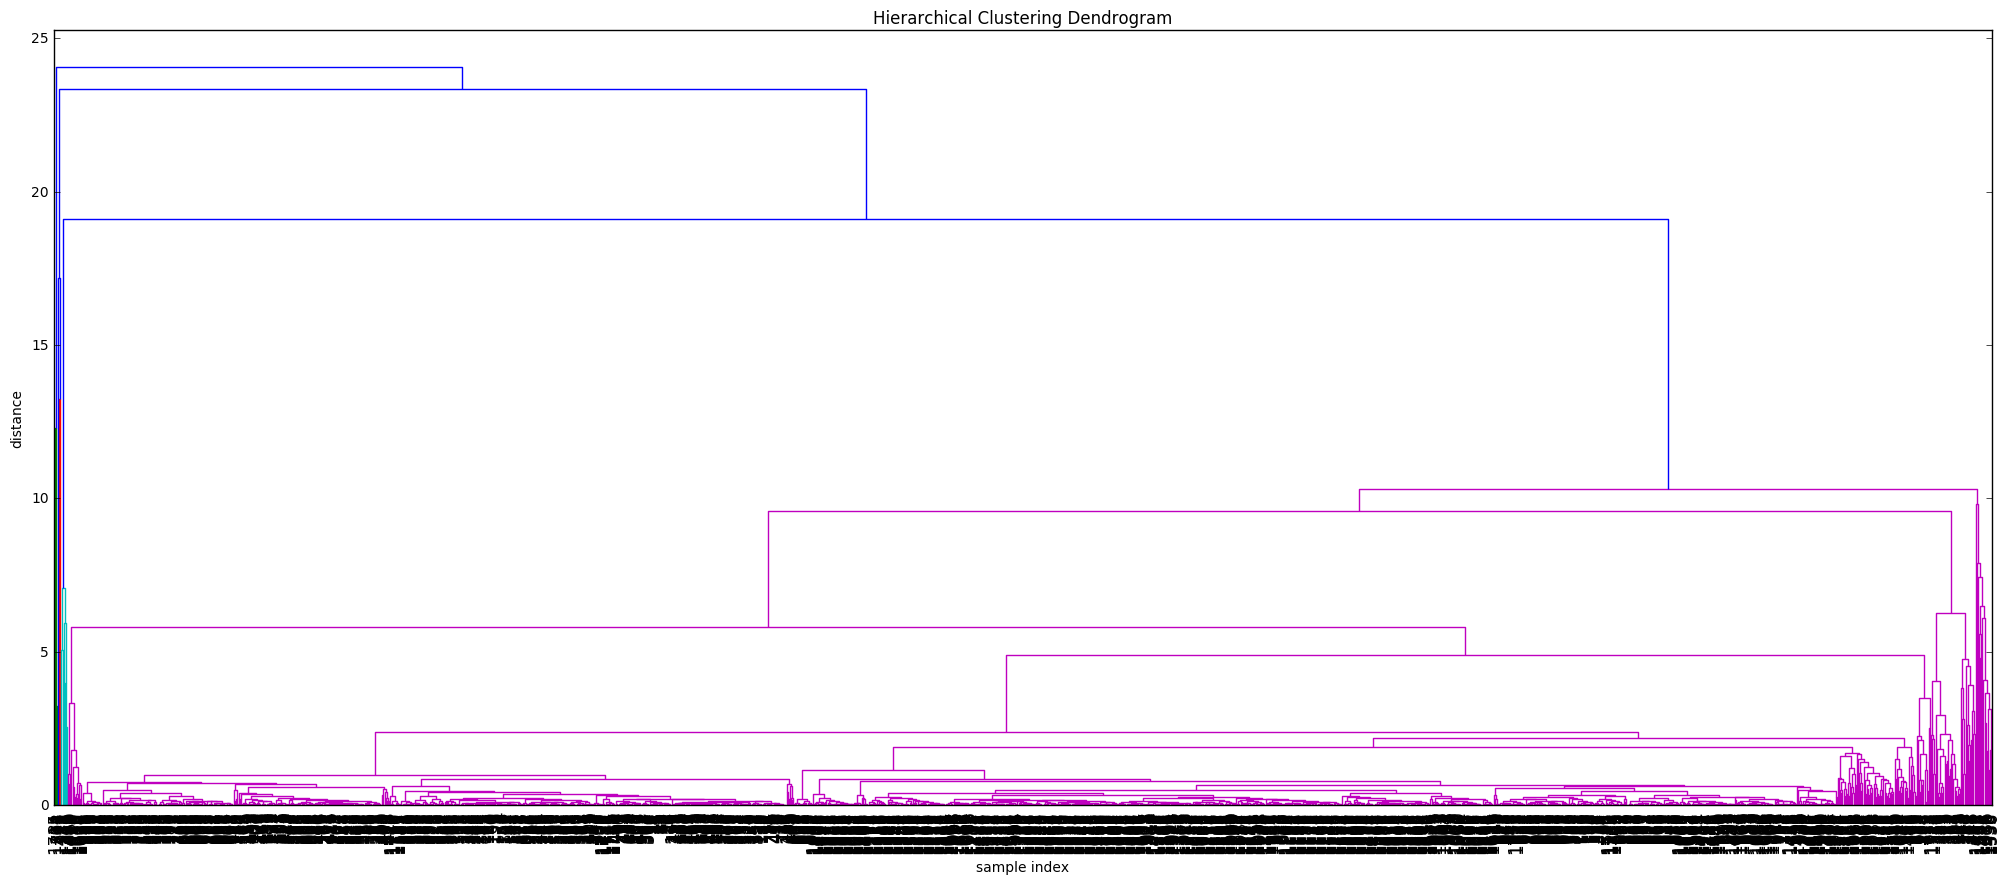

In [74]:

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
#     truncate_mode='lastp',  # show only the last p merged clusters
#     p=50,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [100]:
clusters = fcluster(Z, 10, criterion='distance')

In [81]:
print(len(breakpt_min))
print(len(clusters))
for i in range(len(segs)):
    print(i, len(segs[i]))

845
1745
0 3
1 2
2 4
3 4
4 4
5 4
6 2
7 2
8 4
9 34
10 5
11 4
12 4
13 3
14 10
15 4
16 2
17 2
18 5
19 5
20 4
21 21
22 5
23 23
24 5
25 2
26 4
27 4
28 2
29 2
30 4
31 5
32 5
33 4
34 3
35 2
36 2
37 5
38 5
39 5
40 4
41 5
42 2
43 5
44 5
45 5
46 4
47 4
48 2
49 4
50 5
51 3
52 4
53 4
54 5
55 5
56 5
57 38
58 4
59 5
60 5
61 5
62 5
63 2
64 24
65 4
66 3
67 33
68 5
69 19
70 5
71 43
72 2
73 3
74 20
75 4
76 2
77 5
78 5
79 3
80 2
81 5
82 5
83 4
84 5
85 70
86 4
87 5
88 5
89 4
90 4
91 5
92 2
93 3
94 3
95 2
96 15
97 4
98 5
99 4
100 4
101 2
102 2
103 4
104 5
105 4
106 3
107 2
108 2
109 3
110 4
111 5
112 3
113 5
114 4
115 5
116 5
117 2
118 4
119 4
120 2
121 5
122 3
123 4
124 5
125 5
126 5
127 4
128 4
129 3
130 14
131 2
132 5
133 2
134 4
135 9
136 3
137 2
138 4
139 5
140 5
141 5
142 19
143 2
144 2
145 3
146 19
147 5
148 5
149 4
150 5
151 3
152 4
153 5
154 2
155 2
156 2
157 4
158 5
159 3
160 4
161 2
162 4
163 5
164 76
165 5
166 2
167 3
168 3
169 5
170 5
171 5
172 4
173 5
174 3
175 4
176 15
177 5
178 4
179 3
180 

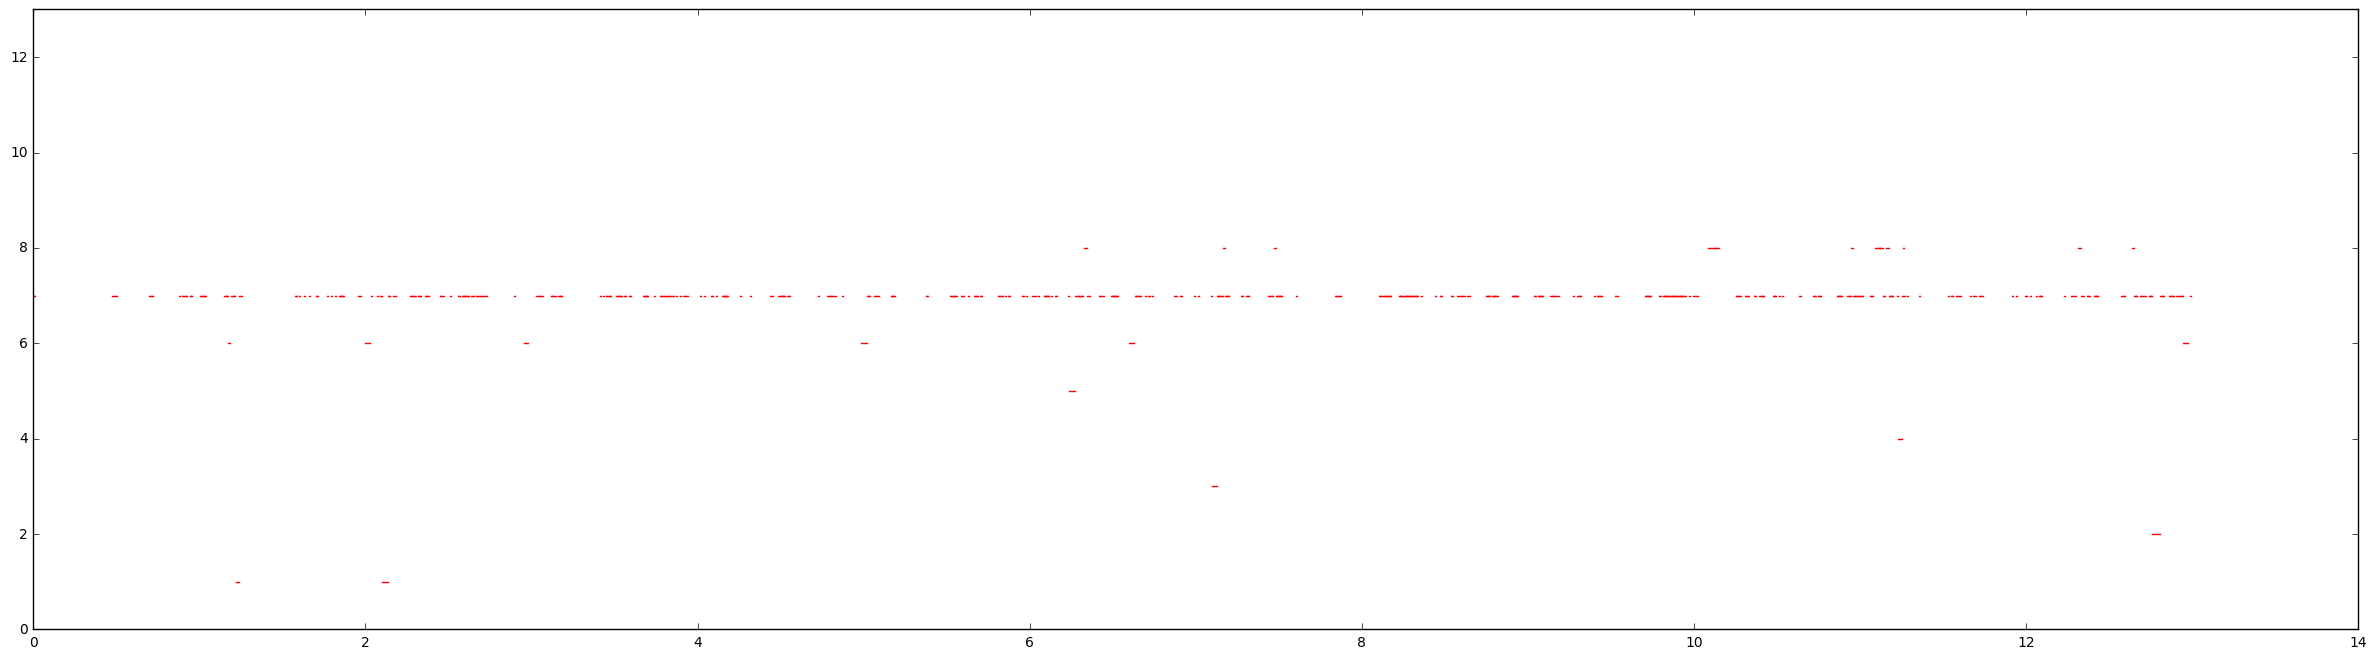

In [101]:
breakpt_min = [0] + [i / 50 / 60 for i in breakpt] + [39050 / 3000]
plt.figure(figsize=(30, 8))
# color = ['r', 'feae2d', 'y', 'g', '12bdb9', 'b', '442299', ]
for i in range(len(breakpt_m_index)):
    lines = plt.plot([breakpt_min[breakpt_m_index[i]+1], breakpt_min[breakpt_m_index[i]+1+1]] ,[clusters[i], clusters[i]], 'r')
    plt.setp(lines, color='r', linewidth=1)
plt.ylim(0, 13)
plt.show()

In [ ]:
breakpt_min = [0] + [i / 50 / 60 for i in breakpt] + [39050 / 3000]
plt.figure(figsize=(30, 12))
# color = ['r', 'feae2d', 'y', 'g', '12bdb9', 'b', '442299', ]
for i in range(len(clusters)):
    lines = plt.plot([breakpt_min[i], breakpt_min[i+1]] ,[clusters[i], clusters[i]], 'r')
    plt.setp(lines, color='r', linewidth=1)
plt.ylim(0, 7)
plt.show()

# Cluster On Head Rotation

In [84]:
import numpy as np  
from math import cos, sin, acos, pi

In [85]:
def radians (array):
    return array*pi/180

# turn euler angle into vector
def euler2Vec (vec3):
    rotx = vec3[0]
    roty = vec3[1]
    rotz = vec3[2]
    x = np.sin(radians(roty))*np.cos(radians(rotx))
    y = -np.sin(radians(rotx))
    z = np.cos(radians(roty))*np.cos(radians(rotx))
    return np.array([x,y,z])

# calculate angle between two vector
def calcAngleDeg (v1,v2):
    # v1*v2/(sqrt(v1*v1)*sqrt(v2*v2))
    costheta = np.sum(np.multiply(v1,v2),axis=1)/(
        np.sqrt(np.sum(np.multiply(v1,v1),axis=1))*
        np.sqrt(np.sum(np.multiply(v2,v2),axis=1)))
    if np.any(abs(costheta)>1):
        print("costheta value wrong:\n")
        print(costheta[(abs(costheta)>1)])
    return 180/pi*np.arccos([min(max(x,-1),1) for x in costheta])

# calculate angular velocity from headvec
# unit: 10*deg/frame
def calcAngleSpeed(headEuler):
    headVec = np.array([euler2Vec(angle) for angle in headEuler])
    print(headVec)
    headVec_t0 = headVec[:-1]
    headVec_t1 = headVec[1:]
    angleSpeed = calcAngleDeg(headVec_t0,headVec_t1)
    return np.append(angleSpeed*50,0) # pad with 0 to get the same length

In [86]:
db = connect()
cursor = db.cursor()
sql = "SELECT RotX, RotY, RotZ FROM hmd_data WHERE CasdId = 26 ORDER BY TimeLog, TimeLogMillisecond"
cursor.execute(sql)
results = np.asarray(cursor.fetchall())
x = results[:, 0]
y = results[:, 1]
z = results[:, 2]

In [87]:
angleSpeed = calcAngleSpeed(results)

[[-0.02230592  0.12348024  0.9920963 ]
 [-0.03251318  0.12940135  0.99105912]
 [-0.03760112  0.13225639  0.9905021 ]
 ..., 
 [-0.66127106  0.32820727  0.67453731]
 [-0.662516    0.32850401  0.67316986]
 [-0.66488063  0.32904795  0.67056781]]
costheta value wrong:

[ 1.]


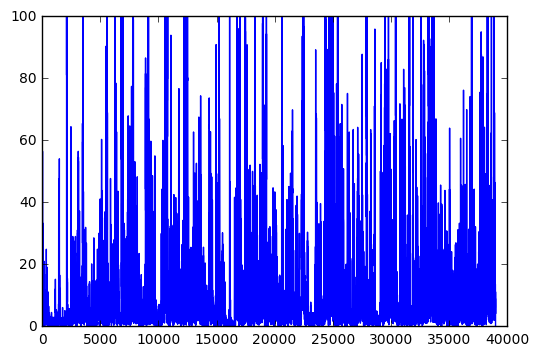

In [66]:
import matplotlib.pyplot as plt
plt.plot(angleSpeed)
plt.ylim(0, 100)
plt.show()


In [88]:
threshold = 10
index, segs = return_moving_bpindex_and_segments(angleSpeed, x, y, z)
breakpts = return_break_point(angleSpeed)

In [76]:
print(segs)

[array([[ 352.907,  358.712,  359.758],
       [ 352.565,  358.121,  359.766],
       [ 352.4  ,  357.826,  359.751],
       [ 352.087,  357.232,  359.721],
       [ 351.769,  356.664,  359.686],
       [ 351.459,  356.105,  359.68 ],
       [ 351.167,  355.573,  359.686],
       [ 351.021,  355.329,  359.69 ],
       [ 350.777,  354.879,  359.714],
       [ 350.58 ,  354.489,  359.754],
       [ 350.431,  354.174,  359.773]]), array([[  3.50249000e+02,   3.53745000e+02,   9.34740000e-02],
       [  3.50331000e+02,   3.53862000e+02,   1.86395000e-01],
       [  3.50481000e+02,   3.54016000e+02,   2.93103000e-01],
       [  3.50725000e+02,   3.54233000e+02,   4.06935000e-01],
       [  3.51055000e+02,   3.54497000e+02,   5.20761000e-01],
       [  3.51264000e+02,   3.54633000e+02,   5.71631000e-01],
       [  3.51765000e+02,   3.54945000e+02,   6.79945000e-01],
       [  3.52483000e+02,   3.55305000e+02,   8.06974000e-01],
       [  3.53382000e+02,   3.55702000e+02,   9.19608000e-01],
 